<a href="https://colab.research.google.com/github/Kae1thas/ML-24/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_3_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


## Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

# Линейная регрессия своими руками

проведем линейную регрессию только по численным столбцам. Их у нас будет 4. <br>
Введем модель целевой переменной как
$$ \begin{align*}
   &y_i = \sum_{j=1}^{4}x_{ij}w_j +\epsilon_i \\
   \text{или так }& y_i = x_{i1}\cdot w_1 + x_{i2}\cdot w_2 + x_{i3}\cdot w_3 + x_{i4}\cdot w_4 + \epsilon_i \\
   \text{или так }& y_i = X_i W^T + \epsilon_i ,
   \end{align*}
   $$
где
<ul>
    <li> $y_i$ - целевой показаль предсказания для $i$ записи в наборе данных;</li>
    <li> $X_i  = \{x_{ij}\}_{j=1}^{4}$ - набор входных параметров для $i$ результата ;</li>
    <li> $W = \{w_{j}\}_{j=1}^{4}$ - набор весовых параметров, которые мы должны подобрать в моделе;</li>
    <li> $\epsilon_i$ - некоторый набор случайных (не объясняемых нашей моделью, остаточных) значений, мы будем считать их случайных шумом.  
</ul>   
    <br> тогда наша регрессионная модель будет иметь вид
         \begin{align*}
   &\hat{y}_i = \sum_{j=1}^{4}x_{ij}w_j  \\
   \text{или так }& \hat{y}_i = x_{i1}\cdot w_1 + x_{i2}\cdot w_2 + x_{i3}\cdot w_3  + x_{i4}\cdot w_4 \\
   \text{или так }& \hat{y}_i = X_i W^T,
   \end{align*}
   
где <ul>
    <li> $\hat{y}_i $ - результат предсказания для $i$ записи в наборе данных.   </ul>   
        
Для начала разобъем данные на тренировочные и тест

In [ ]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32074 non-null  int64  
 1   Distance              32074 non-null  float64
 2   Engine_capacity(cm3)  32074 non-null  float64
 3   Price(euro)           32074 non-null  float64
 4   km_year               32074 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


,0,1,2,3
22446,0.64,0.479896,0.353333,0.251134
22447,0.74,0.465893,0.479167,0.331520
22448,0.70,0.572360,0.333333,0.356492
22449,0.70,0.581916,0.375000,0.362475
22450,0.24,0.579916,0.000000,0.147012


Введем функцию потрерь регрессии как квадрат разности между целевыми значениями и их предсказаниями
$$ L(\hat{y}_i,y_i)=L_i= (\hat{y}_i-y_i)^2 = \left(\sum_{j=1}^{4}x_{ij}w_j-y_i\right)^2 = \left(X_i W^T-y_i\right)^2 , $$
где  $L_i$ - функция потерь для результата (предсказания) с номером $i$. <br>
Также введем функцию расчета (предсказания) значений predict.


In [ ]:
def forward(weights, inputs):
    return inputs.dot(weights.T)

def loss_func(predicts, labels):
        return np.square(predicts - labels)

Протестируем обе функции

In [ ]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[-0.1382643  -0.92213676 -0.90256097 -0.13774822]
-1.2231864328288786 7750.0 7751.223186432829


Посмотрим на график того как меняется функция потерь в зависимости от отклонения (мультипликативного) оценки результата от его истинного значения.

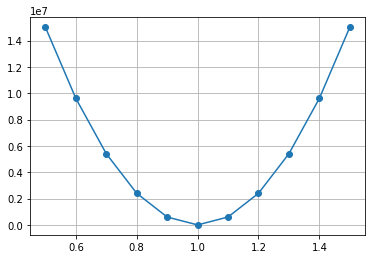

In [ ]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 11)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o'); plt.grid();

Сразу отметим, что нам потребуется не только сама фунция потерь, но и ее производная по набору оптимизируемых параметров $\{w_j\}$.   
$$\frac{\partial L_i}{\partial w_j} = 2\left(\sum_{j=1}^{4}x_{ij}w_j-y_i\right)x_{ij} = 2(\hat{y}_i - y_i)x_{ij},$$
где  $\frac{\partial L_i}{\partial w_j}$ - частная производная функции $L_i$ по параметру $w_j$  <br>   
тогда по набору всех переменных мы получим производную вида:
$$\nabla_{W}L_i  = 2(\hat{y}_i-y_i)\odot X_i,  $$
 где <ul>
    <li> $\nabla_{W}L_i$ - градиент, то есть набор частных производных функции $L_i$ по набору \{$w_j$\}.  
    <li> $\odot$ - операция поэлементного умножения (умножение Адамара)    

In [ ]:
def grad_loss(predicts, labels, inputs):
    return 2*(predicts - labels)*inputs/inputs.size

Проведем расчет градиента ошибки

In [ ]:
weights = np.random.randn(X.shape[1])
yhat = forward(weights, X_train[0])
print(weights)
grad = grad_loss(yhat, y[0], X[0])
print(grad)

[0.19626724 0.35394661 0.82263019 0.48933854]
[-7.79161845e+06 -7.55527398e+08 -6.97409906e+06 -6.86843089e+07]


Оптимизацию мы будем проводить методом градиентного спуска. <br>
По сути этот метод сводится к последовательному (итерационному) пересчету значений весовых параметров обратно значеням градиента ошибки (то есть в направлении, обратном направлению роста ошибки).
<br> обозначим номер итерации как  $t$, тогда выражение для обновления весовых параметров можно записать как:

$$ W^t = W^{t-1}-\eta\nabla_{W}L(\hat{y}_i,y_i)=W^{t-1} - 2\eta (\hat{y}_i-y_i)\odot X_i^T  $$

где <ul>
<li> $\eta$ - коэффициент с которым изменяются значения весовых параметров - т.н. скорость обучения;



In [ ]:
def update_weights(grad, weights, lerning_rate):
    return weights - lerning_rate*grad

теперь проведем обновление весовых параметров

In [ ]:
lerning_rate = 0.01
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[  77916.38072925 7555274.33211281   69741.81319787  686843.57826274]


Помимо того, чтобы обучать значения весовых параметров,  необходимо задать их начальные значения - то есть провести процедуру инициализации. Такую процедуру можно провести с использованием небольших случайных  значений. Разброс этих значений мы выберем как $\sqrt{weight.size}$

In [ ]:
def weights_init(weights, random_state=42):
    if np.ndim(weights)<1:
        weights = np.zeros(weights)

    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)
weights

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493])

Также создадим процедуру обучения. Процедура будет повторять порцесс пересчета весов методом градиентного спуска заданое число раз (epochs).<br>
Функция будет требовать на вход <ul>
    <li> $X$ - набор входных значений (т.н. батч ) в формате: $\textrm{число записей}\times\textrm{значения в записи}$;
    <li> $y$ - набор целевых переменных (labels);   
    <li> $weights$ - начальные значения весовых параметров;
    <li> $lr$ - скорость обучения ($\eta$);    
    <li> $epochs$   -  число эпох обучения.
        </ul>
Функция дает на выходе:<ul>
    <li> $weights$ - набор обученных весовых параметров;
    <li> $cost$    - график функции потерь.
 </ul>
Также отметим, что на практике мы можем обновлять весовые параметры не для кажого отдельного значения $i$, а для целого набора таких значений, тогда более верное выражение будет выглядеть как

$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i),  $$
где $n$ - объем выборки.        

In [ ]:
def fit(X, y, weights, lr,  epochs=30):

    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        for m in range(X.shape[0]):
            yhat  = forward(weights, X[m,:])
            grad += grad_loss(yhat,  y[m], X[m,:])
            loss += loss_func(yhat,  y[m])

        weights = update_weights(grad/X.shape[0],weights, lr)
        cost[i] = loss/X.shape[0]

    return weights, cost

Протестируем обучение

In [ ]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc='none' );
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(FontSize = 25)

    plt.yticks(FontSize = 25);

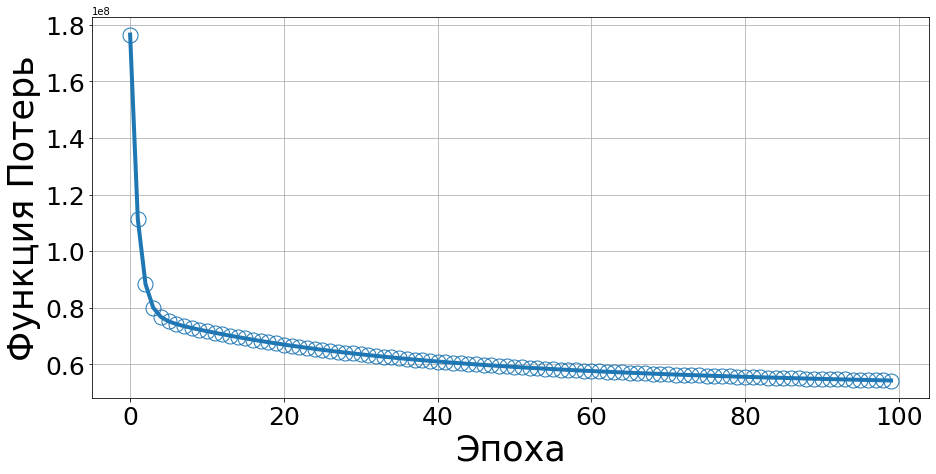

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit(X_train, y_train, weights, lr=0.9,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost);

Теперь проверим как точно предсказывает наша функция, для этого мы можем воспользоваться метрикой $R^2$, метрика соотвествует относительной среднеквадратичной ошибке, она может быть расчитана как:
$$
R^2 = 1-\frac{\sum_{i=0}^{n-1}(y_i - \hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i - \mathrm{ev}(y))^2} = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}},
$$
где
<ul>
    <li>$SS_{\rm res} = \sum_{i=0}^{n-1}L_i = \sum_{i=0}^{n-1}(y_i - \hat{y}_i)^2$ сумма квадратов остатков, величина, характеризующая степень того на сколько наша модель не соответствует нашим данным - то есть то, на сколько мы не можем объяснить нашей моделью наши данные;</li>
    <li>$SS_{\rm tot}$ - дисперсия данных - то есть сумма квадратов разностей значений данных и их среднего значения;</li>
    <li>$\mathrm{ev}(y) = \frac{1}{n}\sum_{i=0}^{n-1}y_i$ - среднее значение.</li>  
</ul>  

In [ ]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])

    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)

    return yhat

посмотрим как выглядят наши ответы на фоне реальных

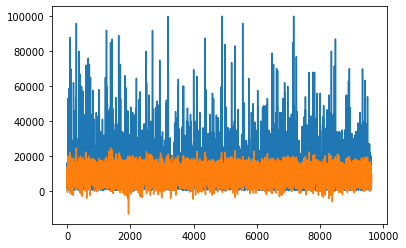

In [ ]:
yhat = predict(weights, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

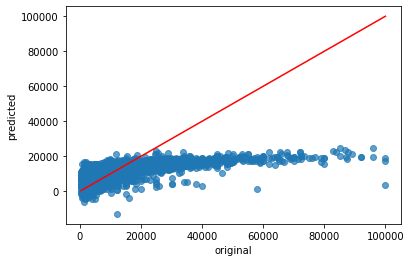

In [ ]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

In [ ]:
def r2_score(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return 1-np.sum(np.square(labels-predicts))/np.sum(np.square(labels-np.mean(labels)))

In [ ]:
r2_score(weights, X_test, y_test)

0.3792007824495638

    На практике как правило, на каждой эпохе рассматривается не веся выборка, а только некоторая ее часть - т.н. батч (мини пакет).

In [ ]:
BATCH = 5000

def fit_SGD(X, y, weights, lr,  epochs=30, batch_size = BATCH, random_state = 42):

    np.random.seed(random_state)


    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        idx_batch = np.random.randint(0,X.shape[0],batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        y_batch   = np.take(y, idx_batch)


        for m in range(batch_size):
            yhat  = forward(weights, x_batch[m,:])
            grad += grad_loss(yhat,  y_batch[m], x_batch[m,:])
            loss += loss_func(yhat,  y_batch[m])

        weights  = update_weights(grad/batch_size,weights, lr)
        cost[i] =loss/batch_size

    return weights, cost

0.4284270588315162


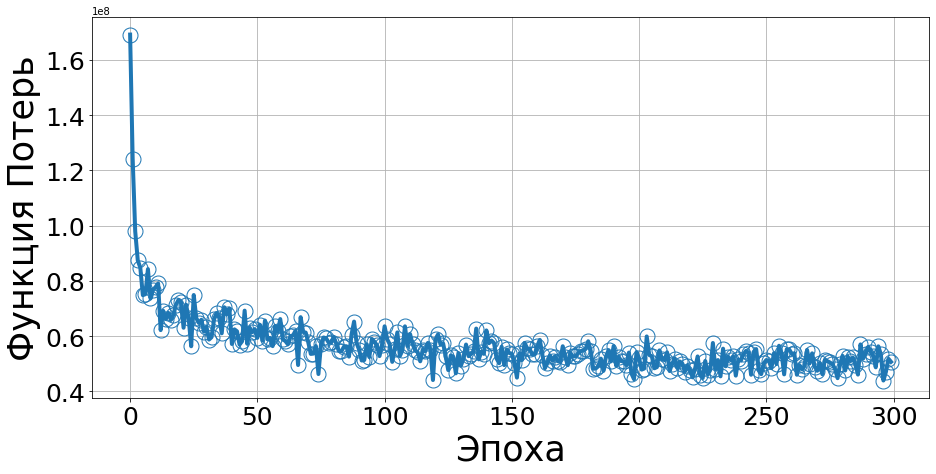

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit_SGD(X_train, y_train, weights, lr=0.7,  epochs=300)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost)

print(r2_score(weights, X_test, y_test))

Теперь давайте объединим все наши часть в один класс линейной регресии.
<br> При объединении мы сделаем две дополнительные модификации нашей модели.
<ul>
    <li> во-первых, введем в модель дополнительный член - смещение (b), тогда можно записать модель так:
        \begin{align*}
        &\hat{y}_i = \sum_{j=1}^{p}x_{ij}w_j+b \\
        \text{   или так: }&\hat{y}_i = \sum_{j=0}^{p}x_{ij}w_j, x_{i0} \equiv 1.
        \end{align*}
        обе записи формально равнозначны. <ul>
        при этом отметим, что градиент функции потерь по остаточному члену можно записать следующим образом:
        $$b^t = b^{t-1}-\eta\nabla_{b}L(\hat{y}_i,y_i)=b^{t-1} - 2\eta(\hat{y}_i-y_i)$$
        </ul>
        Мы будем использовать второй вариант, то есть объединим веса и смещния, а к данным добавим столбец единиц.
<li> Во воторых проведем векторизацию в тех местах, где у нас стояли лишнии циклы.
    <br> В том числе отметим, что выражение для расчет суммарного градиента может быть записано векторно в следующей форме
    $$2\sum_{i=0}^{n-1}(\hat{y}_i-y_i)\odot X_i^T = 2 X^T(\hat{y}-y), $$
    где $\hat{y}, y$ - массивы значений оценок и целевых результатов.
    

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

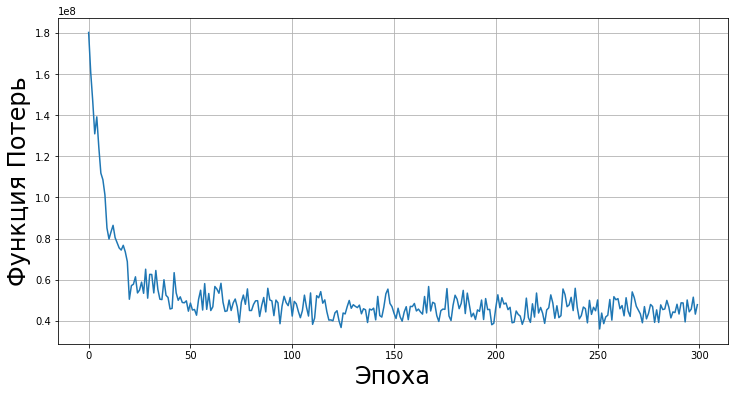

train R2: 0.4861; test R2: 0.4986


In [ ]:
regr = LinearRegression(learning_rate=0.5,epochs=300,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))


посмотрим веса

In [ ]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

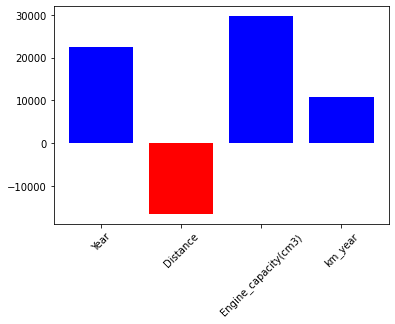

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)


In [ ]:
np.sum(np.abs(w))

79569.04399628073

# Регуляризация линейной регрессии

### Регуляризация Тихонова

Часто бывает так, что обычный градиентный спуск приводит к переобучению модели. Переобучение это ситуация, когда точность на обучающих данных значительно выше, чем на тестовых.

В таких случаях также можно сказать, что данные плохо обусловлены - то есть любые небольшие изменения по отношению к тренировочной выборке приведут к большим изменениям в ответе модели. В целом это будет означать, что модель дает очень большой разброс результатов.

Такой разброс может быть снижен при помощи различных техник регуляризации. Смысл использования таких техник сводится к тому, что при обучении модели к выражению обновления весовых параметров добавляется дополнительное условие.

Например, можно добавить условие ограничение суммы квадратов весовых параметров. Такое предположение называется регрессией Тихонова или гребневой регрессией (а также L2 регуляризацией).

Технически такая регуляризация соответствует предположению, что распределение результатов работы модели имеет вид нормального распределения. Такое предположение часто допустимо и оправдано.<br>
Регрессия Тихонова может быть записана в следующей форме:

$$ \begin{cases}
L(\hat{y}_i,y_i)\to \min \\
\| W \|_2^2< \mathrm{const}
\end{cases}
\to L(\hat{y}_i,y_i) + \frac{\lambda}{2n}\sum_{j=1}^{p} W_j^2\to \min,
$$
где  
<ul>
     <li> $ \| W \|_2^2 = \sum_{j=1}^{p} W_j^2$ - норма Фробениуса для вектора или матрицы;
     <li> $ \lambda $   - регуляризационный множитель;  
     <li> $p$ - размер вектора весовых параметров;
     <li> $n$ - объем выборки весовых параметров;   
</ul>
Закон изменения весовых параметров для данной модели можно зписать как:
$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i) + \frac{\lambda}{n}\sum_{j=1}^{p} W_j. $$
Запишем новую версию регрессии. Для этого запишем новый класс, наследующий от уже созданного и перепишем в нем методы `loss`     и `update`. Также отметим, что смещение не регуляризуется !

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)


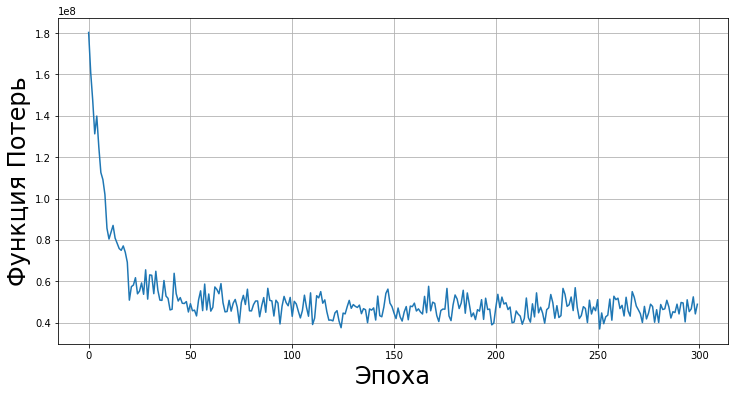

train R2: 0.4858; test R2: 0.4975


In [ ]:
regr = RidgeRegression(learning_rate=0.5,epochs=300,batch_size=3000, l2_penalty = 0.001)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

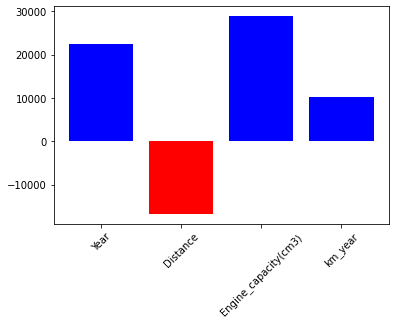

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

78317.62048064734

### Регуляризация L1
В ряде случаев, когда разброс данных оказывается очень большим, регуляризации L2 может оказаться бесполезной или даже вредной. Дело в том, что в функции потерь мы учитываем веса в квадрате и большие колебания весовых параметров приведут к в квадрате большим колебаниям в значениях функции потерь. Часто эта ситуация является недопустимой.

В таких случаях следует выбирать более устойчивые (робастные методы). Робастные методы могут быть менее точными, однако более стабильными. Одним из наиболее распространённых робастных методов является L1 регуляризация. В этом случае выражение для функции потерь может быть записано следующим образом:
$$ \begin{cases}
L(\hat{y}_i,y_i)\to \min \\
\| W \|_1^1 \mathrm{const}
\end{cases}
\to L(\hat{y}_i,y_i) + \frac{\lambda}{2n}\sum_{j=1}^{p} W_j\to \min,
$$
где  
<ul>
     <li> $ \| W \|_1^1 = \sum_{j=1}^{p} W_j$ - норма L1 для вектора или матрицы;
     <li> $ \lambda $   - регуляризационный множитель;  
     <li> $p$ - размер вектора весовых параметров;
     <li> $n$ - объем выборки весовых параметров;   
</ul>
Закон изменения весовых параметров для данной модели можно зписать как:
$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i) + \lambda. $$
Запишем новую версию регрессии. Для этого запишем новый класс, наследующий от уже созданного и перепишем в нем методы `loss`     и `update`.

In [ ]:
class LassoRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        return np.square(yhat - y).mean() + l1_term

    #---------------------------------
    def update(self):
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty)

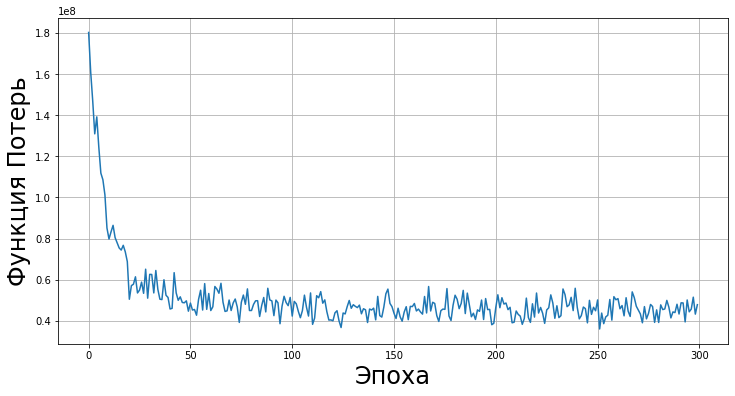

train R2: 0.4861; test R2: 0.4986


In [ ]:
regr = LassoRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

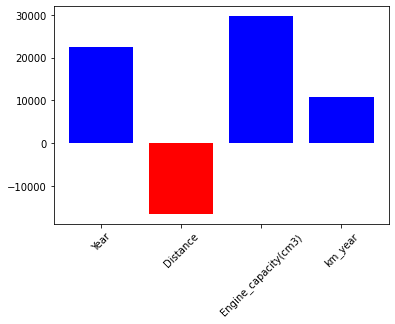

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

79557.81901738435

### Эластичная регуляризация
Отметим, что во многих случаях неизвестно какая модель регуляризации окажется лучше, поэтому целесообразно использовать их обе вместе. Такая модель регуляризации называется эластической регуляризацией. Попробуем ее реализовать

In [ ]:
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

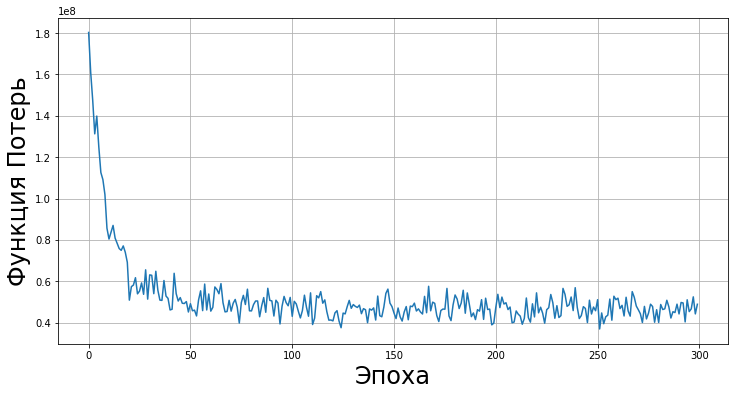

0.49746366836976663 0.48580815010765055


In [ ]:
regr = ElasticRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1,l2_penalty = 0.001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))

посмотрим веса

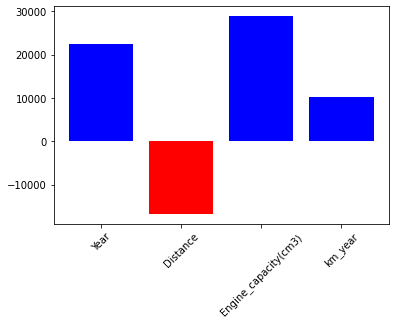

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

78306.59969642476

# Контрольные вопросы

Используя функцию dataset, сгенерируйте линейные зависимости с другими параметрами a, b, N, noise_power (см. с. 49)
и проверьте модель линейной регрессии на этих данных.

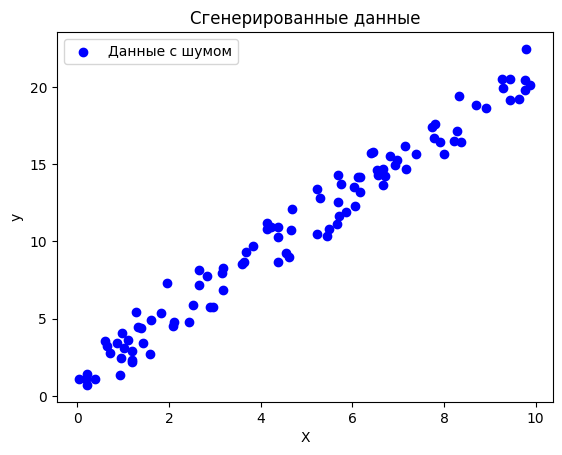

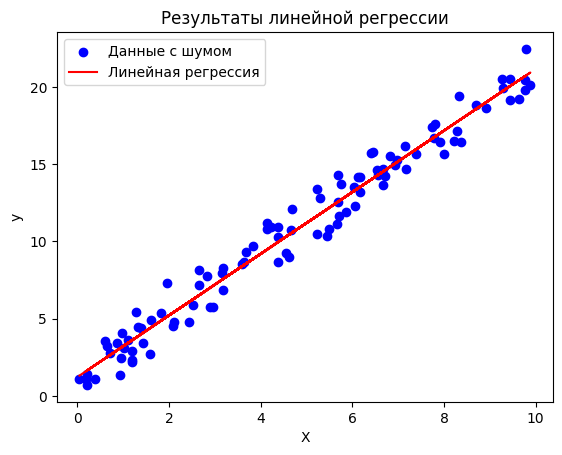

Среднеквадратичная ошибка: 0.9924386487246482
Угловой коэффициент (a): 1.9936935021402045
Свободный член (b): 1.2221510774472257


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Параметры
a = 2.0      # Угловой коэффициент
b = 1.0      # Свободный член
N = 100      # Количество точек
noise_power = 1.0  # Мощность шума

# Генерация данных
np.random.seed(0)  # Для воспроизводимости
X = np.random.rand(N, 1) * 10  # Случайные значения от 0 до 10
noise = np.random.randn(N, 1) * noise_power  # Шум
y = a * X + b + noise  # Линейная зависимость с шумом

# Создание DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Визуализация данных
plt.scatter(data['X'], data['y'], color='blue', label='Данные с шумом')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Сгенерированные данные')
plt.legend()
plt.show()

# Модель линейной регрессии
model = LinearRegression()
model.fit(data[['X']], data['y'])

# Предсказания
y_pred = model.predict(data[['X']])

# Визуализация результатов
plt.scatter(data['X'], data['y'], color='blue', label='Данные с шумом')
plt.plot(data['X'], y_pred, color='red', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Результаты линейной регрессии')
plt.legend()
plt.show()

# Оценка модели
mse = mean_squared_error(data['y'], y_pred)
print(f'Среднеквадратичная ошибка: {mse}')
print(f'Угловой коэффициент (a): {model.coef_[0]}')
print(f'Свободный член (b): {model.intercept_}')


Используя функцию dataset, сгенерируйте гармонические зависимости с другими параметрами (см. с. 50) и проверьте различные степени полиномов исходных данных и разные типы
регуляризации. Посмотрите, что произойдет, если увеличить
регуляризационный множитель.

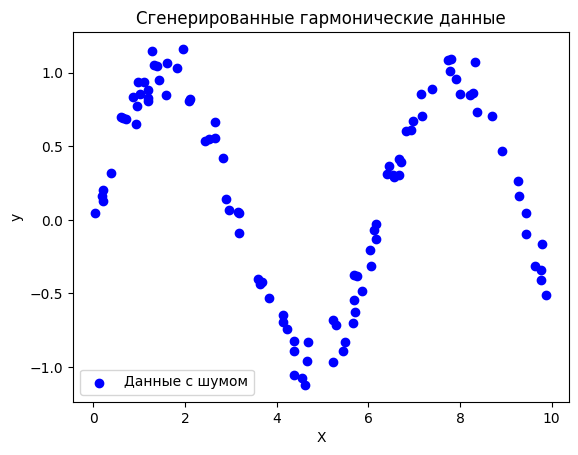

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.484e+00, tolerance: 4.345e-03
  model = cd_fast.enet_coordinate_descent(


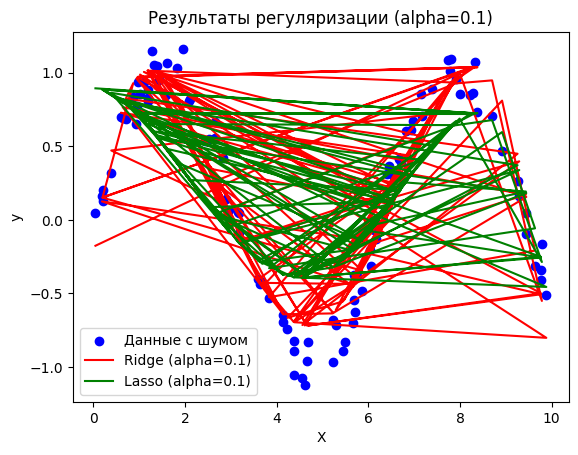

Среднеквадратичная ошибка Ridge (alpha=0.1): 0.03713563429347399
Среднеквадратичная ошибка Lasso (alpha=0.1): 0.1447533809429944


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+01, tolerance: 4.345e-03
  model = cd_fast.enet_coordinate_descent(


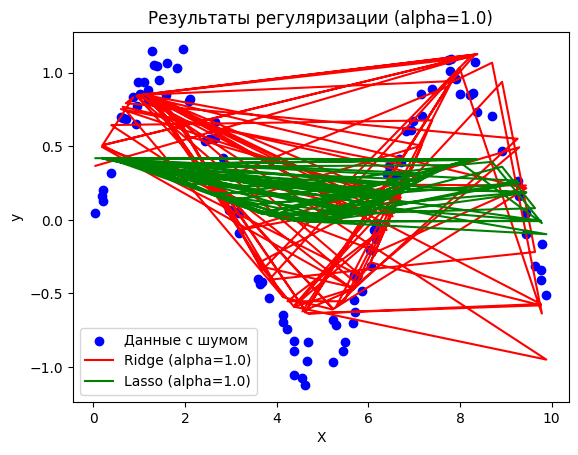

Среднеквадратичная ошибка Ridge (alpha=1.0): 0.06203132568950827
Среднеквадратичная ошибка Lasso (alpha=1.0): 0.2833503521065745


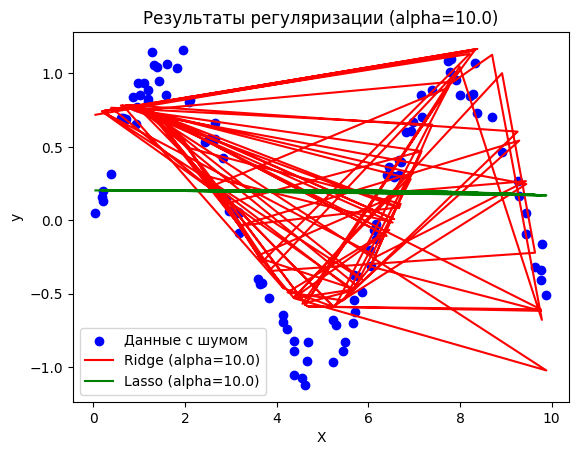

Среднеквадратичная ошибка Ridge (alpha=10.0): 0.09208180930437215
Среднеквадратичная ошибка Lasso (alpha=10.0): 0.4344302159238961


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Параметры
N = 100          # Количество точек
noise_power = 0.1  # Мощность шума
regularization_strength = [0.1, 1.0, 10.0]  # Различные множители регуляризации
degree = 5       # Степень полинома

# Генерация гармонических данных
np.random.seed(0)
X = np.random.rand(N, 1) * 10  # Случайные значения от 0 до 10
y = np.sin(X) + np.random.randn(N, 1) * noise_power  # Гармоническая зависимость с шумом

# Создание DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Визуализация данных
plt.scatter(data['X'], data['y'], color='blue', label='Данные с шумом')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Сгенерированные гармонические данные')
plt.legend()
plt.show()

# Полиномиальные признаки
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(data[['X']])

# Проверка различных степеней полиномов и регуляризации
for reg in regularization_strength:
    # Ridge Regression
    ridge_model = Ridge(alpha=reg)
    ridge_model.fit(X_poly, data['y'])
    y_ridge_pred = ridge_model.predict(X_poly)

    # Lasso Regression
    lasso_model = Lasso(alpha=reg)
    lasso_model.fit(X_poly, data['y'])
    y_lasso_pred = lasso_model.predict(X_poly)

    # Визуализация результатов
    plt.scatter(data['X'], data['y'], color='blue', label='Данные с шумом')
    plt.plot(data['X'], y_ridge_pred, color='red', label=f'Ridge (alpha={reg})')
    plt.plot(data['X'], y_lasso_pred, color='green', label=f'Lasso (alpha={reg})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Результаты регуляризации (alpha={reg})')
    plt.legend()
    plt.show()

    # Оценка моделей
    mse_ridge = mean_squared_error(data['y'], y_ridge_pred)
    mse_lasso = mean_squared_error(data['y'], y_lasso_pred)
    print(f'Среднеквадратичная ошибка Ridge (alpha={reg}): {mse_ridge}')
    print(f'Среднеквадратичная ошибка Lasso (alpha={reg}): {mse_lasso}')


Используйте любую из подготовленных вами моделей линейной регрессии для предсказания цены автомобилей в наборе
данных Cars. Для оценки качества модели используйте отложенную выборку и несколько метрик регрессии. Сравните результаты модели при использовании только числовых признаков и при добавлении категориальных признаков с помощью
One-Hot-кодирования

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files
import time


# Шаг 1: Загрузка файла CSV
uploaded = files.upload()  # Это откроет диалог для загрузки файла
# После загрузки файла прочитайте его
data = pd.read_csv(list(uploaded.keys())[0])


# Выбираем числовые признаки и целевую переменную (Price)
numeric_features = ['Year', 'Distance', 'Engine_capacity(cm3)']
target = 'Price(euro)'

# Разделение данных на тренировочную и тестовую выборки
X_train_num, X_test_num, y_train, y_test = train_test_split(data[numeric_features], data[target], test_size=0.2, random_state=42)

# Модель линейной регрессии с числовыми признаками
model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train)

# Предсказания на тестовой выборке
y_pred_num = model_numeric.predict(X_test_num)

# Метрики оценки модели
print("Модель с числовыми признаками:")
print("MAE:", mean_absolute_error(y_test, y_pred_num))
print("MSE:", mean_squared_error(y_test, y_pred_num))
print("R2 Score:", r2_score(y_test, y_pred_num))

# One-Hot-кодирование категориальных признаков
categorical_features = ['Make', 'Model', 'Fuel_type', 'Transmission', 'Style']
# One-Hot-кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)  # исправлено на sparse_output


# Применяем One-Hot-кодирование к категориальным признакам
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Объединяем числовые и категориальные признаки
X_all = pd.concat([data[numeric_features], pd.DataFrame(encoded_categorical)], axis=1)

# Разделение данных на тренировочную и тестовую выборки с добавлением категориальных признаков
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, data[target], test_size=0.2, random_state=42)

# Модель линейной регрессии с числовыми и категориальными признаками
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)

# Предсказания на тестовой выборке
y_pred_all = model_all.predict(X_test_all)

# Метрики оценки модели
print("\nМодель с числовыми и категориальными признаками (One-Hot-кодирование):")
print("MAE:", mean_absolute_error(y_test, y_pred_all))
print("MSE:", mean_squared_error(y_test, y_pred_all))
print("R2 Score:", r2_score(y_test, y_pred_all))


Saving cars.csv to cars (1).csv
Модель с числовыми признаками:
MAE: 4700.590891743453
MSE: 75967707.36509496
R2 Score: 0.341595285469797


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.